In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns   
import warnings; warnings.simplefilter('ignore')   
%matplotlib inline  

### Data Preparation

In [3]:
### Loading Dataset: open json file as dataframe

# Path: individual_project.ipynb
import json
df = pd.read_json('/Users/toheebadura/Desktop/SFI CRT DATA SCIENCE/CRT PHD PROJECT/Individual Project/Data and Code/Sarcasm_Headlines_Dataset.json', lines=True)   

print(df.shape )
df.head(10) 



(26709, 3)


,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0
7,https://www.huffingtonpost.com/entry/boxed-col...,"this ceo will send your kids to school, if you...",0
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1
9,https://www.huffingtonpost.com/entry/fridays-m...,friday's morning email: inside trump's presser...,0


In [4]:
### dropping columns: dropping article_link column
df.drop(['article_link'], axis=1, inplace=True) 
df.tail(10) 


,headline,is_sarcastic
26699,"what you should buy your 'basic' friend, accor...",0
26700,what's in your mailbox? tips on what to do whe...,0
26701,paul ryan is more of a con man than ever,0
26702,pentagon to withhold budget figures out of res...,1
26703,pope francis wearing sweater vestments he got ...,1
26704,american politics in moral free-fall,0
26705,america's best 20 hikes,0
26706,reparations and obama,0
26707,israeli ban targeting boycott supporters raise...,0
26708,gourmet gifts for the foodie 2014,0


In [5]:
### checking for missing values in the dataset
print(df.isnull().sum())   
df.info()   


headline        0
is_sarcastic    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   headline      26709 non-null  object
 1   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 417.5+ KB


In [6]:
sns.set_style("whitegrid") 

In [7]:
# ### Make the target variable binary
# df['is_sarcastic'] = df['is_sarcastic'].replace(0, 'Non-sarcastic')
# df['is_sarcastic'] = df['is_sarcastic'].replace(1, 'Sarcastic') 
# ### Plotting the target variable after balancing    
# sns.countplot(df['is_sarcastic'])   
# plt.show()  


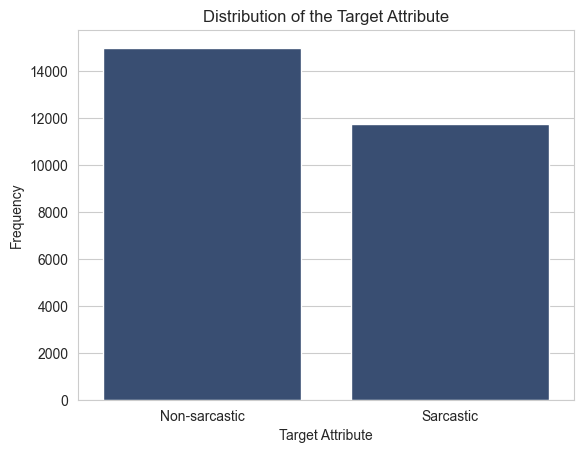

In [8]:
### Getting Value Counts for the is_sarcastic column    
target_count = pd.DataFrame(df['is_sarcastic'].value_counts().reset_index()) 
target_count.columns = ['is_sarcastic', 'count']       

###plotting the value counts for the is_sarcastic column    
 
sns.barplot(x='is_sarcastic', y='count', data=target_count, color = "#2f4b7c")  
### renaming the columns in the barplot
plt.xticks(np.arange(2), ('Non-sarcastic', 'Sarcastic'))
plt.xlabel('Target Attribute') 
plt.ylabel('Frequency') 
plt.title('Distribution of the Target Attribute')       
plt.show()  

 


#### Feature Engineering: Creating  features

In [9]:
import string
import nltk 
import re
#### Getting the length of each headline and adding it as a new column to the dataframe
df["body_len"] = df["headline"].apply(lambda x: len(x) - x.count(" ")) 
### Function to count the number of punctuations in each headline
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round((count/(len(text) - text.count(" "))), 3)*100    
df["punct_percent"] = df["headline"].apply(lambda x: count_punct(x)) 
### Function to get the number of words in each headline    
# def get_word_count(x):
#     return len(x.split())

df.head(10) 


,headline,is_sarcastic,body_len,punct_percent
0,former versace store clerk sues over secret 'b...,0,67,3.0
1,the 'roseanne' revival catches up to our thorn...,0,71,4.2
2,mom starting to fear son's web series closest ...,1,66,1.5
3,"boehner just wants wife to listen, not come up...",1,72,2.8
4,j.k. rowling wishes snape happy birthday in th...,0,54,3.7
5,advancing the world's women,0,24,4.2
6,the fascinating case for eating lab-grown meat,0,40,2.5
7,"this ceo will send your kids to school, if you...",0,54,1.9
8,top snake handler leaves sinking huckabee camp...,1,44,0.0
9,friday's morning email: inside trump's presser...,0,51,5.9


In [10]:
print(df["punct_percent"].describe())

count    26709.000000
mean         2.163668
std          2.554810
min          0.000000
25%          0.000000
50%          1.700000
75%          3.500000
max         30.000000
Name: punct_percent, dtype: float64


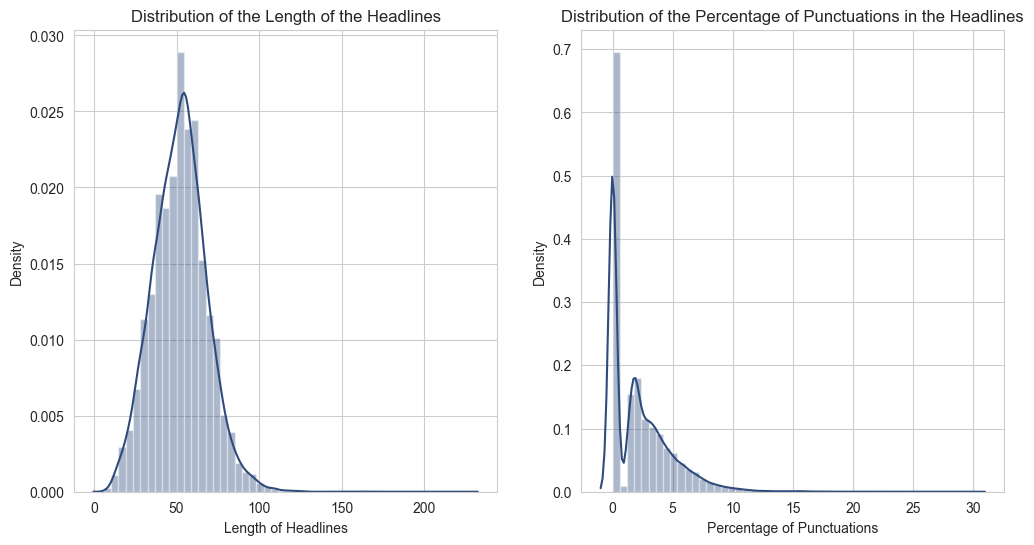

In [11]:
### Plotting the distribution of the length of the headlines and the percentage of punctuations in the headlines    
sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))    
sns.distplot(df['body_len'], ax=ax1, color = "#2f4b7c") 
ax1.set_title('Distribution of the Length of the Headlines')  
ax1.set_xlabel('Length of Headlines')  
sns.distplot(df['punct_percent'], ax=ax2, color = "#2f4b7c")    
ax2.set_title('Distribution of the Percentage of Punctuations in the Headlines') 
ax2.set_xlabel('Percentage of Punctuations')     
plt.show()

In [12]:
#### Getting the average length of the headlines for each target class
df.groupby('is_sarcastic')['body_len'].mean()   


is_sarcastic
0    50.740274
1    53.753071
Name: body_len, dtype: float64

In [17]:
### Using TF-IDF Vectorizer on the complete dataset
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(df['headline'])
X_tfidf_feat = pd.concat([df['body_len'], df['punct_percent'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_tfidf_feat = X_tfidf_feat.rename(str, axis = 1)
X_tfidf_feat.head(10)   

,body_len,punct_percent,0,1,2,3,4,5,6,7,...,24803,24804,24805,24806,24807,24808,24809,24810,24811,24812
0,67,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,71,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,66,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,72,2.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,54,3.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,24,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,40,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,54,1.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,51,5.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Starting Again

In [52]:
## Import Data
url = "https://github.com/toheebadura/Sarcasm_Detection_Task/blob/main/Datasets/Sarcasm_Headlines_Dataset.json?raw=true"
df = pd.read_json(url, lines=True)
df.drop(['article_link'], axis=1, inplace=True)
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


In [53]:
import nltk
from nltk.corpus import stopwords
english_stops = set(stopwords.words('english'))    
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 

wn = WordNetLemmatizer()    
ps = PorterStemmer()    


##Data cleaning function
### data cleaning function

def cleaning(text):
  text = "".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split("\W+", text)
  tokenized_text = [word for word in tokens if word not in english_stops]
  final_text = [wn.lemmatize(word) for word in tokenized_text]
  return final_text

df["clean_headlines"] = df["headline"].map(lambda x: cleaning(x))
print(df.columns)
df.head( )


Index(['headline', 'is_sarcastic', 'clean_headlines'], dtype='object')


,headline,is_sarcastic,clean_headlines
0,former versace store clerk sues over secret 'b...,0,"[former, versace, store, clerk, sue, secret, b..."
1,the 'roseanne' revival catches up to our thorn...,0,"[roseanne, revival, catch, thorny, political, ..."
2,mom starting to fear son's web series closest ...,1,"[mom, starting, fear, son, web, series, closes..."
3,"boehner just wants wife to listen, not come up...",1,"[boehner, want, wife, listen, come, alternativ..."
4,j.k. rowling wishes snape happy birthday in th...,0,"[jk, rowling, wish, snape, happy, birthday, ma..."


In [54]:
### Split data into training and texting sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df["clean_headlines"], df["is_sarcastic"], test_size=0.2, random_state=42)

In [55]:
### Saving Splitted Data
X_train.to_csv("X_train.csv", index=False, header=True)
X_test.to_csv("X_test.csv", index=False, header=True) 
y_train.to_csv("y_train.csv", index=False, header=True) 
y_test.to_csv("y_test.csv", index=False, header=True) 

In [56]:
##Loading Saved Datasets
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")  
y_train = pd.read_csv("y_train.csv")    
y_test = pd.read_csv("y_test.csv")  

print(X_train.shape)    
print(X_test.shape) 
print(y_train.shape)    
print(y_test.shape) 

(21367, 1)
(5342, 1)
(21367, 1)
(5342, 1)


In [57]:
### Initialize TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer()
tfidf_vector.fit(X_train["clean_headlines"])

### Transform train and test data
X_train_tfidf = tfidf_vector.transform(X_train["clean_headlines"])
X_test_tfidf = tfidf_vector.transform(X_test["clean_headlines"])
X_train_tfidf = pd.DataFrame(X_train_tfidf.toarray())
X_test_tfidf = pd.DataFrame(X_test_tfidf.toarray())
X_train_tfidf.columns = tfidf_vector.get_feature_names_out()
X_test_tfidf.columns = tfidf_vector.get_feature_names_out() 
X_train_tfidf = X_train_tfidf.rename(str, axis=1) 
X_test_tfidf = X_test_tfidf.rename(str, axis=1)   
y_train.values.ravel()  

array([1, 1, 1, ..., 0, 1, 0])

In [58]:
####Fitting Random Forest Classifier
##Import Libraries
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier 
from sklearn.metrics import precision_recall_fscore_support as score
import time 

### Fit Random Forest Classifier
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)    
start = time.time() 
### Train Model
rf_model = rf.fit(X_train_tfidf, y_train.values.ravel())   
end = time.time()   
fit_time = (end - start)    
start = time.time() 

### Make Predictions  
y_pred = rf_model.predict(X_test_tfidf)   
end = time.time()   
pred_time = (end - start)       

### Performance Metrics
precision, recall, fscore, train_support = score(y_test, y_pred, average="binary")        
print("Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}".format(round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test["is_sarcastic"]).sum()/len(y_pred), 3)))            
  


Fit time: 859.486 / Predict time: 1.082 ---- Precision: 0.802 / Recall: 0.61 / Accuracy: 0.763


In [59]:
gb = GradientBoostingClassifier(n_estimators=150, max_depth=11, learning_rate=0.1)  
start = time.time() 
gb_model = gb.fit(X_train_tfidf, y_train.values.ravel()) 
end = time.time()   
fit_time = (end - start)    
start = time.time() 
y_pred = gb_model.predict(X_test_tfidf)   
end = time.time()   
pred_time = (end - start)   

### Performance Metrics
precision, recall, fscore, train_support = score(y_test, y_pred, average="binary")        
print("Fit time: {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {}".format(round(fit_time, 3), round(pred_time, 3), round(precision, 3), round(recall, 3), round((y_pred==y_test["is_sarcastic"]).sum()/len(y_pred), 3)))            
  
